# **Importations des Bibliothèques utiles**

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# **Chargement et description du dataset**

In [69]:
# Chargement du jeu de données
data = pd.read_csv("all_data.csv")

In [70]:
# Apercu des cinq premières lignes
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [71]:
# Dimension du jeu de données
data.shape

(186850, 6)

In [72]:
# Les types de chaque variables
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [73]:
data.isna().sum(axis = 0)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [74]:
# Supression des valeurs manquantes
data=data.dropna(axis=0)
data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [75]:
#afficher les doublons
data.duplicated().sum()

618

In [76]:
#afficher les colonnes
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [77]:
print(data["Quantity Ordered"].unique())

['2' '1' '3' '5' 'Quantity Ordered' '4' '7' '6' '8' '9']


In [78]:
print(data["Order ID"].unique())

['176558' '176559' '176560' ... '259355' '259356' '259357']


In [79]:
print(data["Price Each"].unique())

['11.95' '99.99' '600' '11.99' '1700' '14.95' '389.99' '3.84' '150' '2.99'
 '700' '300' '149.99' '109.99' '600.0' '999.99' '400' '379.99'
 'Price Each' '700.0' '1700.0' '150.0' '300.0' '400.0']


In [80]:
print(data["Order Date"].unique())

['04/19/19 08:46' '04/07/19 22:30' '04/12/19 14:38' ... '09/23/19 07:39'
 '09/19/19 17:30' '09/30/19 00:18']


In [81]:
#filtre les valeurs non numeriques
#data = data[data["Price Each"].str.strip().str.isdigit()]

In [82]:
# Filtre les valeurs non numériques
data = data[data["Quantity Ordered"].str.strip().str.isdigit()]

In [103]:
# imputation des variables (Order ID,Quantity Ordered, Price Each et Order Date)
import datetime as dt
data["Order ID"]=data["Order ID"].astype("int")
data["Quantity Ordered"]=data["Quantity Ordered"].astype("int")
data["Price Each"]=data["Price Each"].astype("float")
#data['Order Date'] = pd.to_datetime(data['Order Date'])
print(data.dtypes)


Order ID              int32
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object


In [102]:
data.dtypes.value_counts()

object     3
int32      2
float64    1
Name: count, dtype: int64

In [104]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [105]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Order ID,185950.0,230417.569379,51512.737110,141234.00,185831.25,230367.50,275035.75,319670.0
Quantity Ordered,185950.0,1.124383,0.442793,1.00,1.00,1.00,1.00,9.0
Price Each,185950.0,184.399735,332.731330,2.99,11.95,14.95,150.00,1700.0


In [106]:
#calculer la moyenne de Quantity Ordered
print ("la moyenne :", data["Quantity Ordered"].mean())
print ("la mediane :", data["Quantity Ordered"].median())
#mode_QuantityOrdered = data["Quantity Ordered"].mode()


la moyenne : 1.1243828986286637
la mediane : 1.0


In [107]:
# calculer la varience et l'ecart type
print ("la varience :", data["Quantity Ordered"].var())
print ("ecart type :", data["Quantity Ordered"].std())

la varience : 0.19606530789403653
ecart type : 0.44279262402849096


In [108]:
#calculer la moyenne de price 
print ("la moyenne :", data["Price Each"].mean())
print ("la mediane :", data["Price Each"].median())


la moyenne : 184.39973476741056
la mediane : 14.95


In [109]:
#Calculer la varience et lecart type de price 
print ("la varience :", data["Price Each"].var())
print ("ecart type :", data["Price Each"].std())

la varience : 110710.13788643753
ecart type : 332.7313298840936


# **Visualisation des graphes**

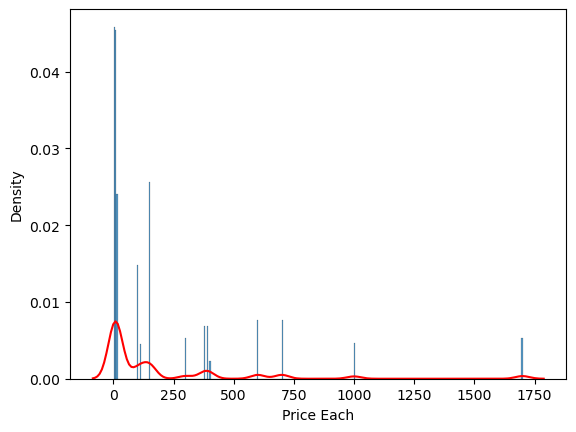

In [111]:
#distribution de chaque variable 
sns.histplot(data = data["Price Each"] , stat = "density" )
sns.kdeplot(data = data["Price Each"] , color = "red")
plt.show()

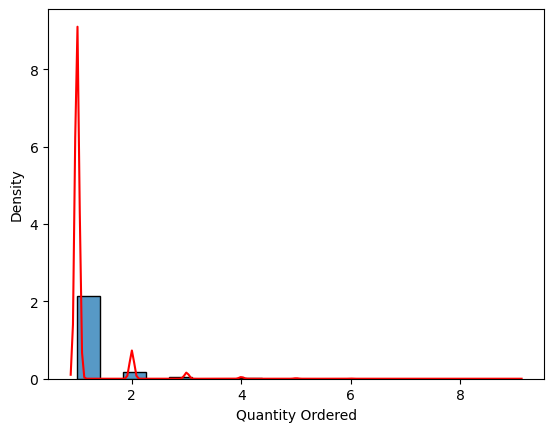

In [112]:
#distribution de chaque variable 
sns.histplot(data = data["Quantity Ordered"] , stat = "density" )
sns.kdeplot(data = data["Quantity Ordered"] , color = "red")
plt.show()

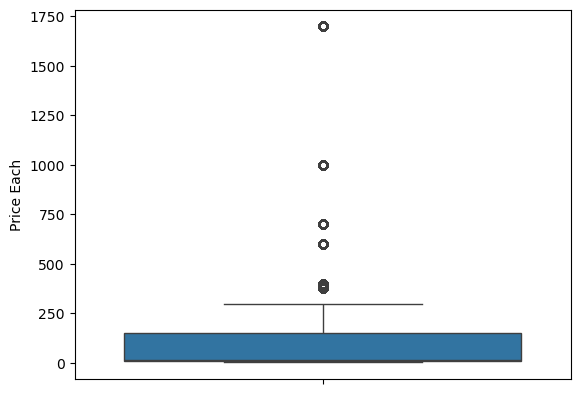

In [113]:
#Analyse des outliers (valeurs aberrantes) : boxplot
sns.boxplot(data = data["Price Each"] )
plt.show()

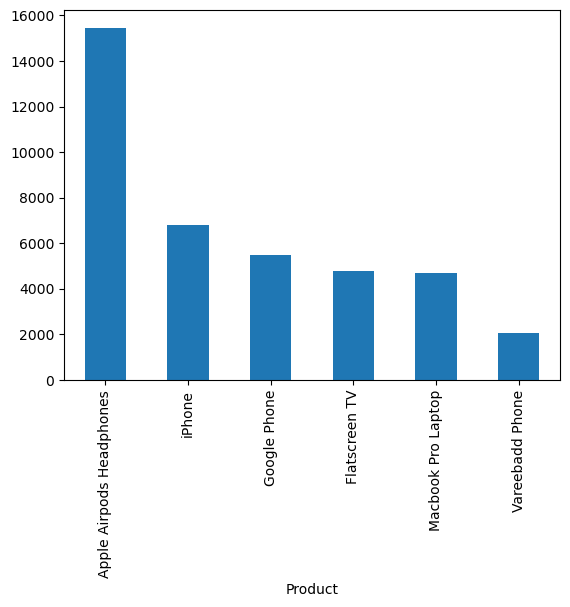

In [53]:
#Diagramme en barre
data["Product"].value_counts().plot.bar()
plt.show()